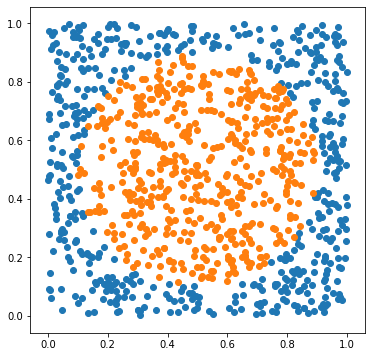

In [1]:
import torch
import math
import matplotlib.pyplot as plt

import Modules
import Sequential
import Optimizer

def generate_disc_set(nb_sample):
    
    data = torch.empty(nb_sample, 2).uniform_(0, 1)
    labels = data.sub(0.5).pow(2).sum(1).sub(1/(2*math.pi)).sign().add(1).div(2).long()
    
    data_out = data[torch.where(labels==1)]
    data_in = data[torch.where(labels==0)]
    
    plt.figure(figsize=(6,6))
    plt.scatter(data_out[:,0],data_out[:,1])
    plt.scatter(data_in[:,0], data_in[:,1])

    return data, labels

data, target = generate_disc_set(1000)

In [2]:
m = Modules.Linear(2,20)
op = m(data)
print(op.size())

b = Modules.ReLu()
print(b(op).size())

torch.Size([1000, 20])
torch.Size([1000, 20])


In [3]:
# Train :

nb_epochs = 25
losses = []

m1 = Modules.Linear(2,25)
m2 = Modules.Linear(25,25)
m3 = Modules.Linear(25,2)
relu = Modules.ReLu()
MSE = Modules.MSE()

sequence = Modules.Sequential(m1, relu, m2, relu, m3, relu)

output = sequence(data)
loss = MSE(output,target)

sgd = Optimizer.SGD(sequence.param())
sgd.step()
sgd2 = Optimizer.SGD(m1.param())
sgd2.step()